In [14]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import sys
sys.path.append('..')

import tidy3d as td
import tidy3d.web as web

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# set up parameters of simulation
dl = 0.01
pml = td.PMLLayer(profile='standard', num_layers=10)
sim_size = [4, 4, 4]
freq0 = 3e14
fwidth = 1e13
run_time = 10/fwidth

# create structure
dielectric = td.nk_to_medium(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Jx')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Hy'],
    center=(0, 0, 0),
    size=(4, 4, 0),
    freqs=[freq0])

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources={'source': source},
                    monitors={'monitor': monitor},
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

task_id = web.upload(sim, task_name='quickstart')
web.start(task_id)
web.monitor(task_id)

[13:35:57] INFO     Creating task.                                              ]8;id=443969;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:283

           INFO     Uploading the json file                                     ]8;id=130793;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:292

Output()

In [21]:
web.download(task_id, simulation=sim, path='data/sim_data.hdf5')

[13:37:35] INFO     clearing existing files before downloading                  ]8;id=71656;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:186

           INFO     removing file data/simulation.json                          ]8;id=958830;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:355

           INFO     downloading file "simulation.json" to                       ]8;id=639191;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:324
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=578405;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:324
                    "data/monitor_data.hdf5"

Output()

[13:37:37] INFO     getting log string                                          ]8;id=519617;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:195

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=165113;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:324

Output()

           INFO     loading old monitor data to data dict                       ]8;id=250018;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:201

           INFO     creating SimulationData from monitor data dict              ]8;id=218170;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:206

           INFO     exporting SimulationData to data/sim_data.hdf5              ]8;id=358804;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:209

           INFO     clearing extraneous files                                   ]8;id=628760;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:212

           INFO     removing file data/simulation.json                          ]8;id=491942;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:355

           INFO     removing file data/monitor_data.hdf5                        ]8;id=773678;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:355

           INFO     removing file data/tidy3d.log                               ]8;id=826237;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:355

           INFO     loading SimulationData from data/sim_data.hdf5              ]8;id=221984;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:236

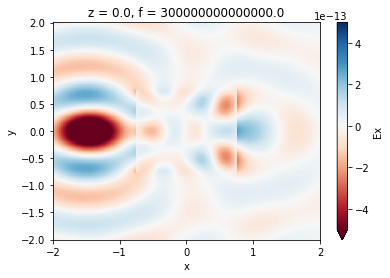

In [22]:
sim_data = web.load(task_id, simulation=sim, path='data/sim_data.hdf5')
ax = sim_data['monitor'].Ex.isel(f=0, z=0).imag.plot.pcolormesh(x='x', y='y', vmin=-5e-13, vmax=5e-13, cmap='RdBu')

plt.show()

In [23]:
from pprint import pprint as print
print(sim_data.task_info)

{'cloudInstanceSize': 1,
 'computeWeight': 2137.290624,
 'coreDuration': 39.0,
 'coreStartTime': '1634330193899771791',
 'errorMessages': None,
 'estCostMax': 5.663905645224961,
 'estCostMin': 2.2655622580899846,
 'execCount': 1,
 'flow360InstanceSize': 24,
 'folderId': 'default',
 'metdataProcessed': True,
 'nodeSize': 10,
 'objectId': 'default',
 'objectRefId': None,
 'objectType': 'FDTD',
 'rankCount': 36,
 'realCost': 1.2460474617796802,
 'running': False,
 's3Storage': 7987684.0,
 'solverEndTime': '2021:10:15:20:37:16',
 'solverStartTime': '2021:10:15:20:36:31',
 'solverVersion': 'release-21.3.1.6',
 'status': 'success',
 'submitTime': '2021:10:15:20:35:58',
 'taskId': 'f104e6c8-981f-4651-9912-ca9899576470',
 'taskName': 'quickstart-16ae4e9e94e7db78-16ae4e9ece1d4608',
 'taskParam': None,
 'taskType': 'em',
 'timeSteps': 80,
 'updateTime': None,
 'userEmail': None,
 'userId': 'AIDAXWCOWJGJBISZJPJQZ',
 'worker': 'base',
 'workerGroup': 'flow360cluster'}


In [24]:
sim_data.log

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 57696
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Get source modes time (s):    0.1321
Get monitor modes time (s):   0.0402
Rest of setup time (s):       0.0803

Starting solver...
- Time step   2307 / time 4.00e-14s (  4 % done), field decay: 1.00e+00
- Time step   4591 / time 7.96e-14s (  7 % done), field decay: 1.00e+00
- Time step   4615 / time 8.00e-14s (  8 % done), field decay: 1.00e+00
- Time step   6923 / time 1.20e-13s ( 12 % done), field decay: 8.06e-03
- Time step   9231 / time 1.60e-13s ( 16 % done), field decay: 2.85e-03
- Time step  11539 / time 2.00e-13s ( 20 % done), field decay: 1.31e-03
- Time step  13847 / time 2.40e-13s ( 24 % done), field decay: 3.15e-04
- Time step  16154 / time 2.80e-13s ( 28 % done), field decay: 1.87e-04
- Time step  18462 / time 3.20e-13s ( 32 % done